In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!tree ../

../
├── app.py
├── data
│   ├── 1000_projects_w_highest_scores.csv
│   ├── added_high_score_projects.csv
│   ├── all_licenses.csv
│   ├── best_sample_projects.csv
│   ├── best_sample_repositories.csv
│   ├── community_table_old.csv
│   ├── db_tables
│   │   ├── community_table.csv
│   │   ├── license_table.csv
│   │   ├── popularity_table.csv
│   │   ├── projects.csv
│   │   └── security_table.csv
│   ├── db_tables_no_missing
│   │   ├── community_table.csv
│   │   ├── license_table.csv
│   │   ├── popularity_table.csv
│   │   ├── projects.csv
│   │   └── security_table.csv
│   ├── good_sample_repositories.csv
│   ├── high_score_pilot_list_osshs.csv
│   ├── license_score_with_projects.csv
│   ├── licenses_sample copy.csv
│   ├── licenses_sample.csv
│   ├── new_low.csv
│   ├── popularity_data.txt
│   ├── popularity_table_old.csv
│   └── urls_sample.csv
├── dependencies
│   ├── all_project_languages.csv
│   ├── not_languages.csv
│   ├── shortlisted_language_deps.csv
│   └── shortlisted_l

In [3]:
community = pd.read_csv('../data/db_tables/community_table.csv')
popularity = pd.read_csv('../data/db_tables/popularity_table.csv')
security = pd.read_csv('../data/db_tables/security_table.csv')
license = pd.read_csv('../data/licenses_sample.csv')
ref_license_csv = pd.read_csv('../data/db_tables/license_table.csv')


print(f'community cols: {community.columns}\n')
print(f'popularity cols: {popularity.columns}\n')
print(f'security cols: {security.columns}\n')
print(f'license cols: {license.columns}\n')


community cols: Index(['project_name', 'documentation', 'has_contributing_guidelines',
       'has_readme', 'project_id', 'repository_id', 'score', 'rank',
       'community_health_score', 'score_last_calculated', 'open_issues_count',
       'closed_issues_count', 'open_pr_count', 'closed_pr_count'],
      dtype='object')

popularity cols: Index(['project_id', 'repository_id', 'project_name', 'platform', 'rank',
       'score', 'subscribers_count', 'dependents_count',
       'dependent_repos_count', 'forks_count', 'stargazers_count',
       'contributions_count', 'popularity_health_score'],
      dtype='object')

security cols: Index(['project_id', 'repository_id', 'project_name', 'repository_url',
       'score_last_calculated', 'security_scan_score',
       'scaled_security_scan_score'],
      dtype='object')

license cols: Index(['project_id', 'repository_id', 'project_name', 'has_license',
       'license_set_by_admin', 'license_normalized', 'license'],
      dtype='object')



# Popularity score adjustments

In [4]:
popularity.head().T

0                       1  \
project_id                              429671                  152902   
repository_id                             1957                    2476   
project_name             orgmanager/orgmanager  paultag/python-charlie   
platform                             Packagist                    Pypi   
rank                                         3                       7   
score                                       43                      41   
subscribers_count                         24.0                     2.0   
dependents_count                             0                       0   
dependent_repos_count                        0                       0   
forks_count                                108                       1   
stargazers_count                           198                       2   
contributions_count                         22                       1   
popularity_health_score                  22.13                   19.96   

                                                             2  \
project_id                                             1024242   
repository_id                                             7038   
project_name             Daniel15/prometheus-net.SystemMetrics   
platform                                                 NuGet   
rank                                                         6   
score                                                       54   
subscribers_count                                          3.0   
dependents_count                                             3   
dependent_repos_count                                        1   
forks_count                                                  2   
stargazers_count                                            17   
contributions_count                                          1   
popularity_health_score                                  19.99   

                                                3  \
project_id                                 513379   
repository_id                                7082   
project_name             danielbachhuber/dictator   
platform                                Packagist   
rank                                            7   
score                                          53   
subscribers_count                            23.0   
dependents_count                                0   
dependent_repos_count                           0   
forks_count                                    22   
stargazers_count                              270   
contributions_count                             7   
popularity_health_score                     21.12   

                                                        4  
project_id                                         839598  
repository_id                                        7494  
project_name             devlead/Devlead.Console.Template  
platform                                            NuGet  
rank                                                    6  
score                                                  56  
subscribers_count                                     1.0  
dependents_count                                        0  
dependent_repos_count                                   0  
forks_count                                             0  
stargazers_count                                       21  
contributions_count                                     1  
popularity_health_score                             19.96

In [5]:
reg_cols = ['subscribers_count', 'dependents_count', 'dependent_repos_count',
            'forks_count', 'stargazers_count', 'contributions_count']
pop = popularity[reg_cols]

In [6]:
pop.describe()

subscribers_count  dependents_count  dependent_repos_count  \
count         487.000000        487.000000             487.000000   
mean          109.090349        792.353183            3863.893224   
std           522.630302       8366.244834           31830.365052   
min             0.000000          0.000000               0.000000   
25%             1.000000          0.000000               0.000000   
50%             3.000000          0.000000               0.000000   
75%            17.000000          1.000000               1.000000   
max          7976.000000     160850.000000          384553.000000   

        forks_count  stargazers_count  contributions_count  
count    487.000000        487.000000           487.000000  
mean     837.143737       3261.453799            31.579055  
std     4880.977306      12784.428152            87.969677  
min        0.000000          0.000000             0.000000  
25%        0.000000          1.000000             1.000000  
50%        5.000000         22.000000             2.000000  
75%       81.500000        453.500000            11.500000  
max    85818.000000     160671.000000           483.000000

In [8]:
log_pop = np.log(1+ pop)
log_pop.describe()

subscribers_count  dependents_count  dependent_repos_count  \
count         487.000000        487.000000             487.000000   
mean            2.086667          1.005698               1.255682   
std             1.812694          2.202829               2.656795   
min             0.000000          0.000000               0.000000   
25%             0.693147          0.000000               0.000000   
50%             1.386294          0.000000               0.000000   
75%             2.890372          0.693147               0.693147   
max             8.984318         11.988234              12.859840   

       forks_count  stargazers_count  contributions_count  
count   487.000000        487.000000           487.000000  
mean      2.585571          3.777924             1.725444  
std       2.644372          3.244154             1.592466  
min       0.000000          0.000000             0.000000  
25%       0.000000          0.693147             0.693147  
50%       1.791759          3.135494             1.098612  
75%       4.412780          6.119168             2.524928  
max      11.359996         11.987120             6.182085

In [17]:
np.power(2, 3)

8

In [25]:
def absfunc(x, k=1):
    return x/(1+np.abs(np.power(x,k)))

aflog_pop = absfunc(log_pop)
aflog_pop.describe()

subscribers_count  dependents_count  dependent_repos_count  \
count         487.000000        487.000000             487.000000   
mean            0.575194          0.196319               0.217720   
std             0.205142          0.319906               0.335008   
min             0.000000          0.000000               0.000000   
25%             0.409384          0.000000               0.000000   
50%             0.580940          0.000000               0.000000   
75%             0.742955          0.409384               0.409384   
max             0.899843          0.923007               0.927849   

       forks_count  stargazers_count  contributions_count  
count   487.000000        487.000000           487.000000  
mean      0.511595          0.610583             0.513447  
std       0.342776          0.326785             0.242704  
min       0.000000          0.000000             0.000000  
25%       0.000000          0.409384             0.409384  
50%       0.641803          0.758191             0.523495  
75%       0.815252          0.859534             0.716270  
max       0.919094          0.923001             0.860765

<AxesSubplot:>

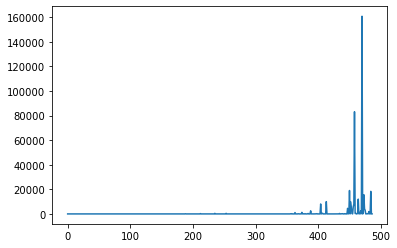

In [10]:
pop.dependents_count.plot()

<AxesSubplot:>

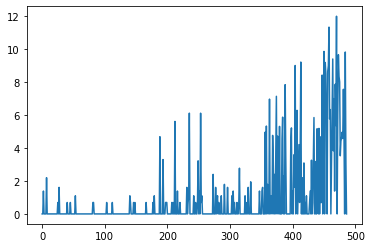

In [11]:
log_pop.dependents_count.plot()

<AxesSubplot:>

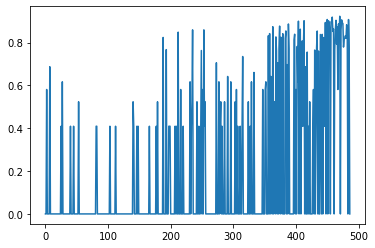

In [26]:
aflog_pop.dependents_count.plot()

<ipython-input-49-3a14f3ea05c7>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, absfunc(x), np.log(absfunc(x)))


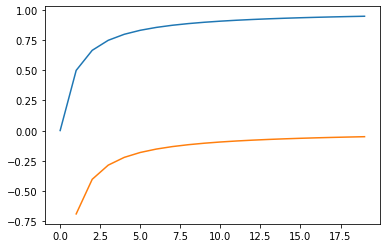

In [49]:
def sqs(x):
    return x/np.sqrt(1+x)
x = np.arange(20)
plt.plot(x, absfunc(x), np.log(absfunc(x)))

<AxesSubplot:>

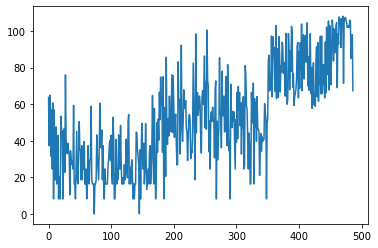

In [37]:
(aflog_pop.sum(1)*20).plot()

In [62]:
def absolute_s_shape(x):
    return x/(np.abs(x)+1)

def logscale(x):
    return np.log(1.+x)

def transform(x):
    return absolute_s_shape(logscale(x))
def popularity_score(df):
    """
    Computes the popularity subscore by multiplying by the below coefficients.
    """
    coefs = np.array([50,  20.,  12., 9., 6., 3.])
    columns = ['contributions_count', 'subscribers_count', 'stargazers_count', 
               'dependents_count', 'dependent_repos_count', 'forks_count']
    A = transform(df[columns])
    df['pop_score'] = round(A.dot(coefs), 2)
    return df

In [63]:
pops = popularity_score(popularity[['project_name']+reg_cols])

<ipython-input-62-5d9a60a77e3b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop_score'] = round(A.dot(coefs), 2)


In [65]:
pops[pops.project_name=='numpy/numpy']

project_name  subscribers_count  dependents_count  dependent_repos_count  \
473  numpy/numpy              558.0             15569                  44971   

     forks_count  stargazers_count  contributions_count  pop_score  
473         6329             19197                  483      87.54

# Community score with newly added fields

In [4]:
col = 'closed_pr_count'
print(community[col].unique())
def format_value(x: str):
    if pd.isna(x): return 0
    if type(x) == str and not x.isspace():
        out = int(x.replace(',', ''))
        return np.log(1.+ out)
    else:
        return x
# open_issues_count
# closed_issues_count
# open_pr_count
# closed_pr_count
cols = ['open_issues_count', 'closed_issues_count', 'open_pr_count', 'closed_pr_count']
for c in cols:
    community[c] = community[c].apply(lambda x: format_value(x))

['425' '0' '2' nan '1' '33' '3' '25' '7' '27' '37' '42' '18' '64' '16' '4'
 '20' '11' '8' '9' '54' '5' '10' '22' '14' '157' '152' '30' '6' '315' '69'
 '17' '15' '12' '252' '192' '29' '188' '110' '181' '79' '36' '19' '26'
 '56' '62' '93' '148' '398' '45' '53' '150' '129' '31' '13' '28' '119'
 '361' '4,456' '1,217' '71' '112' '943' '790' '207' '44' '245' '51' '100'
 '168' '415' '166' '21' '159' '212' '147' '60' '134' '185' '92' '547'
 '124' '108' '418' '72' '536' '267' '502' '61' '201' '146' '827' '115'
 '66' '24' '167' '127' '327' '829' '34' '176' '357' '43' '825' '58' '106'
 '87' '75' '198' '244' '205' '406' '296' '383' '2,230' '3,210' '599'
 '1,063' '1,235' '1,442' '22,996' '913' '302' '47' '67' '1,201' '1,676'
 '1,081' '1,526' '2,882' '183' '28,400' '10,587' '66,605' '45,950'
 '21,511' '13,592' '5,355' '15,489' '5,037' '10,247' '15,078' '7,216'
 '19,399' '1,634' '3,304' '389' '413' '3,372' '2,450' '43,359' '20,171'
 '59' '2,002']


In [5]:
def normalize(df, col):
    max_ = df[col].max()
    min_ = df[col].min()
    df["normalized_"+col] = (df[col] - min_)/(max_ - min_)
    return df
for c in cols:
    community = normalize(community, c)

In [6]:
community.head().T

0  \
project_name                      orgmanager/orgmanager   
documentation                                       NaN   
has_contributing_guidelines     .github/CONTRIBUTING.md   
has_readme                                    readme.md   
project_id                                       429671   
repository_id                                      1957   
score                                                43   
rank                                                  3   
community_health_score                               50   
score_last_calculated                              50.0   
open_issues_count                              2.772589   
closed_issues_count                            4.564348   
open_pr_count                                  2.890372   
closed_pr_count                                6.054439   
normalized_open_issues_count                   0.310988   
normalized_closed_issues_count                 0.432439   
normalized_open_pr_count                       0.353079   
normalized_closed_pr_count                     0.545123   

                                                     1  \
project_name                    paultag/python-charlie   
documentation                                      NaN   
has_contributing_guidelines                        NaN   
has_readme                                   README.md   
project_id                                      152902   
repository_id                                     2476   
score                                               41   
rank                                                 7   
community_health_score                              20   
score_last_calculated                             20.0   
open_issues_count                                  0.0   
closed_issues_count                                0.0   
open_pr_count                                      0.0   
closed_pr_count                                    0.0   
normalized_open_issues_count                       0.0   
normalized_closed_issues_count                     0.0   
normalized_open_pr_count                           0.0   
normalized_closed_pr_count                         0.0   

                                                                    2  \
project_name                    Daniel15/prometheus-net.SystemMetrics   
documentation                                                     NaN   
has_contributing_guidelines                                       NaN   
has_readme                                                  README.md   
project_id                                                    1024242   
repository_id                                                    7038   
score                                                              54   
rank                                                                6   
community_health_score                                             20   
score_last_calculated                                            20.0   
open_issues_count                                                 0.0   
closed_issues_count                                          0.693147   
open_pr_count                                                0.693147   
closed_pr_count                                              1.098612   
normalized_open_issues_count                                      0.0   
normalized_closed_issues_count                               0.065671   
normalized_open_pr_count                                     0.084673   
normalized_closed_pr_count                                   0.098916   

                                                       3  \
project_name                    danielbachhuber/dictator   
documentation                                        NaN   
has_contributing_guidelines              CONTRIBUTING.md   
has_readme                                     README.md   
project_id                                        513379   
repository_id                                       7082   
score                

<AxesSubplot:>

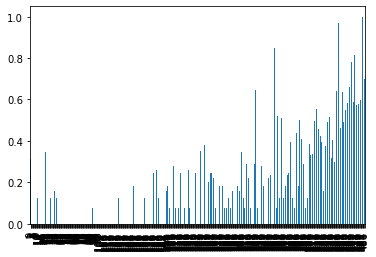

In [207]:
(community.open_issues_count/community.open_issues_count.max()).plot(kind='bar')

In [189]:
np.log(1)/np.log(3), 1/3

(0.0, 0.3333333333333333)

In [208]:
for c in cols:
    print(f'{c}:\t\t min = {community[c].min()}\t max = {community[c].max()}')

open_issues_count:		 min = 0.0	 max = 8.915432254432663
closed_issues_count:		 min = 0.0	 max = 10.554900864611765
open_pr_count:		 min = 0.0	 max = 8.186185994226083
closed_pr_count:		 min = 0.0	 max = 11.106549942560703


In [197]:
community.plot(x='project_name', y=['normalized_open_issues_count', 'normalized_closed_issues_count'], kind='bar', figsize=(15, 8))
# plt.x

<AxesSubplot:xlabel='project_name'>

In [195]:
community.plot(x='project_name', y=['normalized_open_issues_count', 'normalized_open_pr_count'], kind='bar', figsize=(15, 8))
# plt.x

<AxesSubplot:xlabel='project_name'>

<AxesSubplot:xlabel='project_name'>

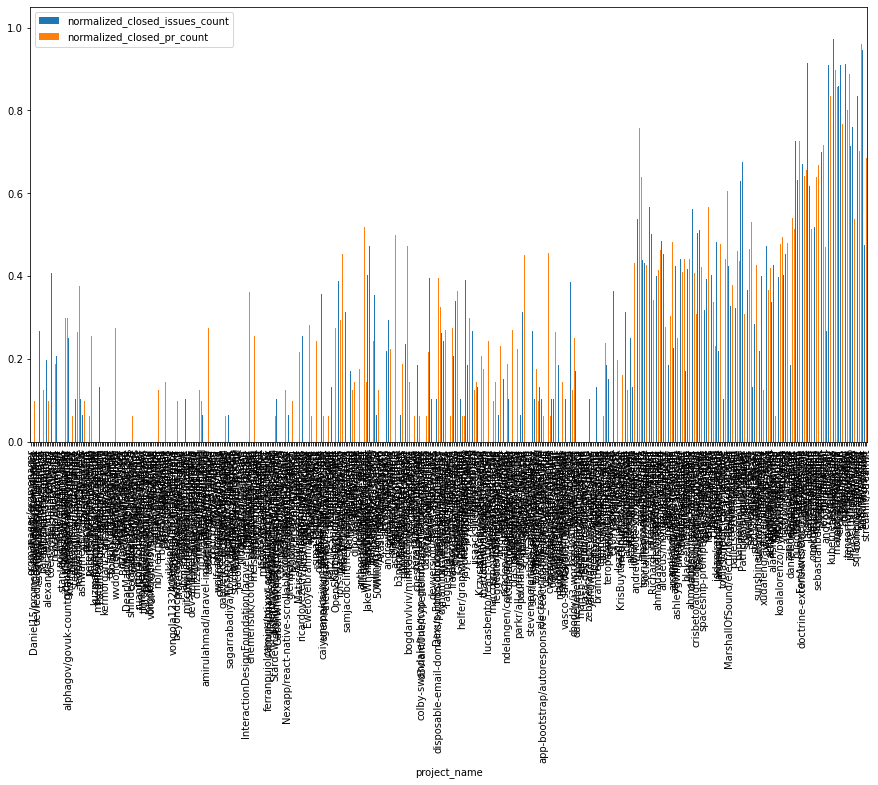

In [196]:
community.plot(x='project_name', y=['normalized_closed_issues_count', 'normalized_closed_pr_count'], kind='bar', figsize=(15, 8))


In [108]:
N_pr = community[(community.open_pr_count == 0) & (community.closed_pr_count == 0)].shape[0]
rate_pr = N_pr/len(community)
N_pr, len(community), rate_pr

(133, 487, 0.2731006160164271)

In [110]:
N_issue = community[(community.open_issues_count == 0) | (community.closed_issues_count == 0)].shape[0]
rate_issue = N_issue/len(community)
N_issue, len(community), rate_issue

(238, 487, 0.4887063655030801)

In [71]:
community['open_issues_count']

0        15
1         0
2         0
3         0
4         0
       ... 
482     493
483    7445
484    1735
485      34
486     507
Name: open_issues_count, Length: 487, dtype: int64

In [70]:
community['project_interest'] = community.apply(lambda row: row['open_issues_count']/row['closed_issues_count']\
                                                if row['closed_issues_count'] != 0 else 0, axis=1)
community['project_activity'] = community.apply(lambda row: row['open_pr_count']/row['closed_pr_count'] \
                                            if row['closed_pr_count'] != 0 else 0, axis=1)
community['open_dynamics'] = community.apply(lambda row: row['open_pr_count']/row['open_issues_count'] \
                                            if row['open_issues_count'] != 0 else 0, axis=1)
community['closed_dynamics'] = community.apply(lambda row: row['closed_pr_count']/row['closed_issues_count'] \
                                            if row['closed_issues_count'] != 0 else 0, axis=1)

In [241]:
new_feats = ['project_interest', 'project_activity', 'open_dynamics', 'closed_dynamics']
for c in new_feats:
    print(f'normalized_{c}:\t\t min = {community["normalized_"+c].min()}\t max = {community["normalized_"+c].max()}')

normalized_project_interest:		 min = 0.0	 max = 1.0
normalized_project_activity:		 min = 0.0	 max = 1.0
normalized_open_dynamics:		 min = 0.0	 max = 1.0
normalized_closed_dynamics:		 min = 0.0	 max = 1.0


In [256]:
new_feats = ['project_interest', 'project_activity', 'open_dynamics', 'closed_dynamics']
for c in new_feats:
    print(f'{c}:\t\t min = {np.tanh(np.log(community[c]+1)).min()}\t max = {np.tanh(np.log(1+community[c])).max()}')

project_interest:		 min = 0.0	 max = 0.9210501175337644
project_activity:		 min = 0.0	 max = 0.9091812371559286
open_dynamics:		 min = 0.0	 max = 0.8983691421107158
closed_dynamics:		 min = 0.0	 max = 0.9771586075777523


In [255]:
sigmoid??

In [239]:
for c in new_feats:
    community = normalize(community, c)

In [252]:
np.average(community["project_interest"])

0.47819836204340777

In [242]:
community[-50:].plot(x='project_name', y=["normalized_"+c for c in new_feats], kind='bar', figsize=(18, 6))

<AxesSubplot:xlabel='project_name'>

In [ ]:
for c in cols:
    community = normalize(community, c)

In [111]:
community['delta_open_closed_issues'] = community.closed_issues_count - community.open_issues_count
community['delta_open_closed_pr'] = community.closed_pr_count - community.open_pr_count

<AxesSubplot:xlabel='project_name'>

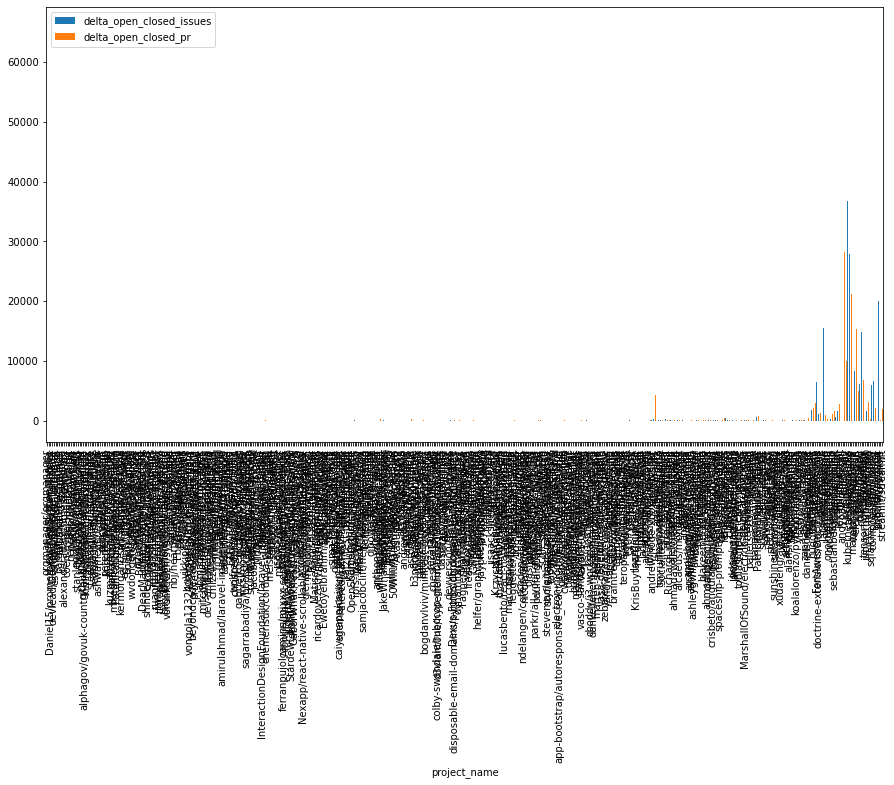

In [112]:
community.plot(x = 'project_name', y=['delta_open_closed_issues', 'delta_open_closed_pr'], 
               kind='bar', figsize=(15, 8))

In [66]:
community['delta_open_pr_issues'] =  1.*community.open_pr_count / community.open_issues_count
community['delta_closed_pr_issues'] = 1.*community.closed_pr_count / community.closed_issues_count 

<AxesSubplot:xlabel='project_name'>

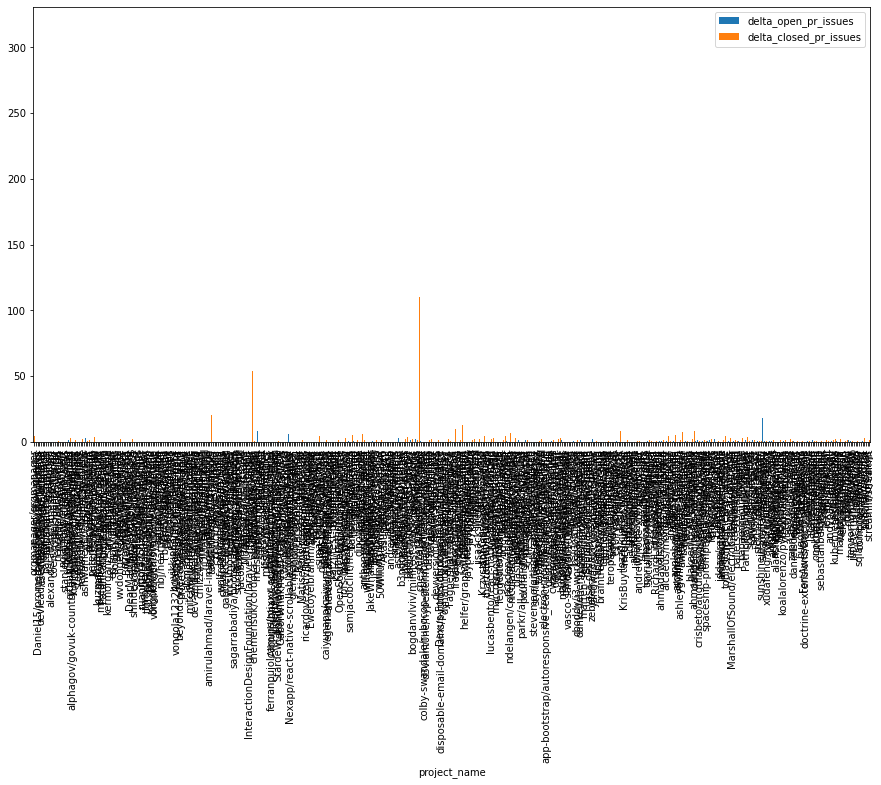

In [67]:
community.plot(x = 'project_name', y=['delta_open_pr_issues', 'delta_closed_pr_issues'],
              kind='bar', figsize=(15, 8))

In [69]:
np.inf

inf

In [68]:
community['delta_open_pr_issues'].unique()

array([1.13333333e+00,            nan,            inf, 0.00000000e+00,
       2.50000000e-01, 1.00000000e+00, 5.23809524e-01, 3.00000000e+00,
       3.33333333e-01, 2.00000000e-01, 8.00000000e+00, 6.00000000e+00,
       1.81818182e-01, 1.25000000e-01, 7.77777778e-01, 5.00000000e-01,
       2.10084034e-02, 1.00000000e-01, 5.92592593e-01, 9.09090909e-02,
       6.25000000e-02, 2.75000000e+00, 4.00000000e+00, 2.85714286e-01,
       6.50000000e-01, 1.31250000e+00, 2.00000000e+00, 7.00000000e+00,
       1.11111111e-01, 5.88235294e-02, 1.76470588e-01, 3.84615385e-02,
       1.72413793e-01, 1.33333333e+00, 3.75000000e-01, 1.42857143e-01,
       4.00000000e-01, 7.50000000e-01, 8.06451613e-02, 1.23809524e+00,
       3.00000000e-01, 1.67192429e-01, 6.92307692e-01, 1.66666667e-01,
       1.17647059e-01, 4.76190476e-02, 8.83534137e-02, 3.35254060e-02,
       3.57142857e-01, 1.16504854e-01, 2.05479452e-02, 8.33333333e-02,
       8.33333333e-01, 3.42857143e-01, 2.06521739e-01, 1.85185185e-01,
      

In [118]:
community['delta_open_closed_issues'].min()

-212.0

In [171]:
def sigmoid(x):
    return  (1./(1. + np.exp(-x) )-0.5)
sigmoid(-1)

-0.2310585786300049

In [179]:
np.tanh(8)

0.9999997749296758

In [31]:
community.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   project_name                 487 non-null    object 
 1   documentation                136 non-null    object 
 2   has_contributing_guidelines  79 non-null     object 
 3   has_readme                   414 non-null    object 
 4   project_id                   487 non-null    int64  
 5   repository_id                487 non-null    int64  
 6   score                        487 non-null    int64  
 7   rank                         487 non-null    int64  
 8   community_health_score       487 non-null    int64  
 9   score_last_calculated        464 non-null    float64
 10  open_issues_count            484 non-null    object 
 11  closed_issues_count          484 non-null    object 
 12  open_pr_count                484 non-null    object 
 13  closed_pr_count     

### Put all subscores into [0 - 100] scale 

In [129]:
print(f'community, score: {(community[community.community_health_score.notna()].community_health_score.max())}')
print(f'popularity, score: {(popularity[popularity.popularity_health_score.notna()].popularity_health_score.max())}')
print(f'security, score: {(security[security.security_scan_score.notna()].security_scan_score.max())}')
print(f'license, score: {(license[license.permissiveness_score.notna()].permissiveness_score.max())}')

community, score: 100
popularity, score: 76.77308027213701
security, score: 7.4/10
license, score: 97


In [130]:
def scale_up(score):
    output = score
    if (pd.isna(score)):
        output = score
    elif (score and not score.isspace()):
        output = float(score.split('/')[0])*10
    return output

In [138]:
security.security_scan_score

0      5.8/10
1      4.7/10
2      4.3/10
3         NaN
4      4.1/10
        ...  
459    6.1/10
460    5.8/10
461    7.0/10
462    6.1/10
463    4.9/10
Name: security_scan_score, Length: 464, dtype: object

In [142]:
upscaled_sec_scores = security.apply(lambda row: scale_up(row['security_scan_score']), axis=1)

In [143]:
security['score_last_calculated'] = upscaled_sec_scores

In [151]:
security.drop(['has_no_missing'], axis=1).to_csv("../data/db_tables/security_table.csv", index=None)

### Add `score_last_calculated` columns in all tables

In [146]:
community["score_last_calculated"] =  community.community_health_score

In [153]:
community.drop(['has_no_missing'], axis=1).to_csv('../data/db_tables/community_table.csv', index=None)

In [150]:
popularity.

project_name  \
0                    orgmanager/orgmanager   
1                   paultag/python-charlie   
2    Daniel15/prometheus-net.SystemMetrics   
3                 danielbachhuber/dictator   
4         devlead/Devlead.Console.Template   
..                                     ...   
459                          cakephp/phinx   
460                           slimphp/Slim   
461                          wp-cli/wp-cli   
462                      TeXitoi/structopt   
463                     andybalholm/brotli   

                                         documentation  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4    https://www.devlead.se/posts/2021/2021-01-15-m...   
..                                                 ...   
459                                  https://phinx.org   
460                           http://slimframework.com   
461                                https://wp-cli.org/   
462                                                NaN   
463                                                NaN   

    has_contributing_guidelines has_readme  project_id  repository_id  score  \
0       .github/CONTRIBUTING.md  readme.md      429671           1957     43   
1                           NaN  README.md      152902           2476     41   
2                           NaN  README.md     1024242           7038     54   
3               CONTRIBUTING.md  README.md      513379           7082     53   
4                           NaN  README.md      839598           7494     56   
..                          ...        ...         ...            ...    ...   
459             CONTRIBUTING.md  README.md      472432        1539666     68   
460             CONTRIBUTING.md  README.md      560436        1544414     84   
461                         NaN        NaN     3494505        1572425     70   
462                         NaN  README.md     3448588        1601072      0   
463                         NaN  README.md     2613797        1639746      0   

     rank  community_health_score  has_no_missing  score_last_calculated  
0       3                      50            True                     50  
1       7                      20            True                     20  
2       6                      20            True                     20  
3       7                      50           False                     50  
4       6                      70            True                     70  
..    ...                     ...             ...                    ...  
459    25                     100            True                    100  
460    28                     100            True                    100  
461    19                      50            True                     50  
462    22                      20           False                     20  
463    26                      20            True                     20  

[464 rows x 11 columns]

In [87]:

print(f'community, nrows not null: {(community.community_health_score.notna().sum())}')
print(f'popularity, nrows not null: {(popularity.popularity_health_score.notna().sum())}')
print(f'security, nrows not null: {(security.security_scan_score.notna().sum())}')
print(f'license, nrows not null: {(license.permissiveness_score.notna().sum())}')

community, nrows not null: 464
popularity, nrows not null: 464
security, nrows not null: 442
license, nrows not null: 310


In [88]:
project_ids_licensed =  license.project_id
project_ids_has_security_score = security[security.security_scan_score.notna()].project_id
(project_ids_licensed), project_ids_has_security_score

(0       429671
 1      1167037
 2      1601884
 3       152902
 4       579484
         ...   
 305    3213220
 306     777257
 307    2580366
 308    3281089
 309     464420
 Name: project_id, Length: 310, dtype: int64,
 0       429671
 1       152902
 2      1024242
 4       839598
 5      1152361
         ...   
 459     472432
 460     560436
 461    3494505
 462    3448588
 463    2613797
 Name: project_id, Length: 442, dtype: int64)

In [89]:
project_ids_no_missing = list(set(project_ids_licensed) & set(project_ids_has_security_score))
len(project_ids_no_missing)

295

In [98]:
len(community[community.has_no_missing])

295

In [90]:
def has_no_missing(project_id, project_ids_no_missing=project_ids_no_missing):
    return project_id in project_ids_no_missing
    
for df in [community, popularity, security,license]:
    df['has_no_missing'] = df.apply(lambda row : has_no_missing(row['project_id']), axis=1)

In [96]:
path='../data/db_tables_no_missing/'
!ls {path}

In [125]:
community[community.has_no_missing].drop(['has_no_missing'], axis=1).to_csv(path+'community_table.csv', index=None)
popularity[popularity.has_no_missing].drop(['has_no_missing'], axis=1).to_csv(path+'popularity_table.csv', index=None)
security[security.has_no_missing].drop(['has_no_missing'], axis=1).to_csv(path+'security_table.csv', index=None)
license[license.has_no_missing].drop(['has_no_missing'], axis=1).to_csv(path+'license_table.csv', index=None)


In [118]:
projects = pd.read_csv('../data/db_tables/projects.csv')
projects['has_no_missing'] = projects.apply(lambda row : has_no_missing(row['project_id']), axis=1)

In [124]:
projects[projects.has_no_missing].drop(['has_no_missing'], axis=1).to_csv(path+'projects.csv', index=None)

In [114]:

def get_sec_score(score):
    return float(score.split('/')[0])*10
get_sec_score('5.8/10')

58.0

In [117]:
security[security.has_no_missing].apply(lambda row : get_sec_score(row['security_scan_score']), axis=1)

0      58.0
1      47.0
2      43.0
4      41.0
5      45.0
       ... 
457    66.0
459    61.0
460    58.0
461    70.0
463    49.0
Length: 295, dtype: float64

In [123]:
for df in [community, popularity, security, license]:
            print(df.set_index('project_id').sort_index())
            

                          project_name  \
project_id                               
3430               Lukasa/requests-ftp   
23025            ararslan/Jackknife.jl   
25790                absalomedia/kilns   
36073                   jglovier/fizzy   
36763             adamdburton/nanoftpd   
...                                ...   
3461029     ashfurrow/Nimble-Snapshots   
3494505                  wp-cli/wp-cli   
3495048                       sferik/t   
3498064               whyrusleeping/gx   
3517340                 88250/city-geo   

                                                documentation  \
project_id                                                      
3430                                                      NaN   
23025                                                     NaN   
25790                                                     NaN   
36073                           http://atom.io/packages/fizzy   
36763                                                     NaN  